In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import os
import cv2 as cv

In [5]:
path=r"C:\Users\ARBAJ\Downloads\archive (10)\tomato\train"

In [7]:
dis=os.listdir(path)
dis

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [16]:
dis.index('Tomato___Early_blight')

1

In [17]:
Data=[]
for i in dis:# ALL FOLDERS INSIDE PARENT PATH
    A=os.path.join(path,i) #FOR JOINING PATHS
    for j in os.listdir(A):# FOR GETTING ALL CONTENT FROM FOLDER
        B=os.path.join(A,j)#JOIN
        img=cv.imread(B)#CONVERTING IMAGE TO PIXEL INTENSITY MATRIX
        C=cv.resize(img,(150,150))# RESIZING PIXEL INTENSITY MATRIX
        T=dis.index(i) #FOR GETTING TARGET VARIABLE
        Data.append([C,T]) #TO STORE

In [13]:
i=cv.imread(r"C:\Users\ARBAJ\Downloads\archive (10)\tomato\train\Tomato___Bacterial_spot\b0fc7984-f1bf-4d50-b495-0a363445158f___UF.GRC_BS_Lab Leaf 9102.JPG")


In [14]:
i.shape

(256, 256, 3)

In [19]:
Data[1]

[array([[[110, 113, 128],
         [109, 112, 127],
         [106, 109, 124],
         ...,
         [ 95, 102, 117],
         [ 88,  95, 110],
         [ 91,  98, 113]],
 
        [[112, 115, 130],
         [114, 117, 132],
         [104, 107, 122],
         ...,
         [ 91,  98, 113],
         [102, 109, 124],
         [112, 119, 134]],
 
        [[ 96,  99, 114],
         [ 98, 101, 116],
         [104, 107, 122],
         ...,
         [103, 110, 125],
         [ 88,  95, 110],
         [ 96, 103, 118]],
 
        ...,
 
        [[147, 149, 160],
         [149, 152, 162],
         [147, 149, 160],
         ...,
         [145, 149, 160],
         [149, 153, 164],
         [148, 152, 163]],
 
        [[143, 145, 156],
         [145, 147, 158],
         [149, 151, 162],
         ...,
         [145, 149, 159],
         [141, 145, 156],
         [149, 153, 164]],
 
        [[146, 148, 159],
         [153, 155, 166],
         [134, 136, 148],
         ...,
         [149, 153, 164],
  

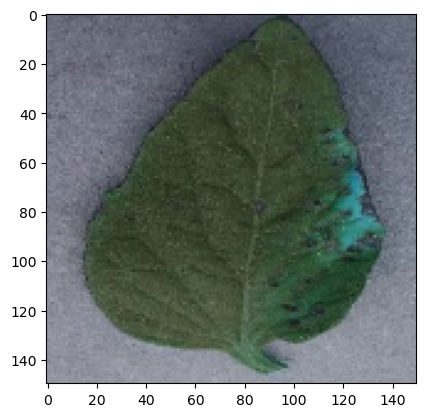

In [20]:
plt.imshow(Data[1][0])#IMAGE SHWING CODE

In [22]:
len(Data)

10000

In [23]:
len(Data[1][0])

150

In [28]:
Data[7872][1]

1

In [27]:
import random #for shuffle
random.shuffle(Data)

In [29]:
F=[]
T=[]
for i,j in Data:#FOR SEPERATING FEATURES AND TARGETS
    F.append(i)
    T.append(j)

In [31]:
len(F)

10000

In [32]:
T

[5,
 3,
 3,
 1,
 2,
 9,
 3,
 7,
 2,
 9,
 3,
 0,
 6,
 1,
 1,
 6,
 3,
 9,
 7,
 2,
 0,
 5,
 4,
 7,
 0,
 7,
 3,
 1,
 8,
 5,
 0,
 3,
 1,
 3,
 6,
 1,
 7,
 6,
 5,
 9,
 6,
 0,
 0,
 6,
 3,
 6,
 1,
 6,
 8,
 8,
 7,
 1,
 9,
 0,
 2,
 9,
 5,
 1,
 6,
 9,
 6,
 5,
 5,
 8,
 7,
 4,
 8,
 6,
 0,
 4,
 0,
 6,
 9,
 3,
 9,
 0,
 0,
 9,
 1,
 1,
 5,
 6,
 0,
 4,
 3,
 6,
 9,
 8,
 4,
 4,
 4,
 1,
 8,
 2,
 1,
 7,
 4,
 0,
 1,
 5,
 2,
 8,
 3,
 5,
 4,
 4,
 8,
 1,
 2,
 6,
 3,
 5,
 5,
 6,
 8,
 8,
 0,
 3,
 2,
 2,
 3,
 7,
 8,
 5,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 5,
 0,
 7,
 7,
 7,
 5,
 7,
 6,
 1,
 6,
 9,
 4,
 9,
 8,
 4,
 2,
 4,
 9,
 3,
 1,
 0,
 6,
 0,
 2,
 1,
 1,
 2,
 8,
 4,
 9,
 5,
 4,
 7,
 4,
 9,
 4,
 1,
 5,
 3,
 4,
 0,
 0,
 0,
 4,
 0,
 5,
 7,
 4,
 1,
 1,
 6,
 1,
 0,
 1,
 7,
 0,
 4,
 2,
 2,
 9,
 9,
 5,
 7,
 1,
 4,
 5,
 5,
 3,
 6,
 7,
 8,
 2,
 0,
 0,
 6,
 8,
 1,
 1,
 9,
 8,
 8,
 9,
 3,
 9,
 1,
 4,
 0,
 1,
 2,
 6,
 4,
 2,
 0,
 2,
 2,
 7,
 5,
 6,
 2,
 6,
 3,
 2,
 3,
 2,
 5,
 7,
 5,
 8,
 4,
 0,
 4,
 7,
 7,
 7,
 7,
 0,
 7,
 0,
 7,


In [36]:
T1=pd.get_dummies(T).replace({True:1,False:0}) # THESE TARGETS ARE NOMINAL SO GETTING DUMMIES FOR MAINTAING THE IN BETWEEN RELATION WITHOUT AFFECTING THE MODEL
T1

C:\Users\ARBAJ\AppData\Local\Temp\ipykernel_13168\3722759232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0})


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,1,0
9996,0,0,0,0,0,0,1,0,0,0
9997,0,0,0,0,0,0,0,1,0,0
9998,0,0,0,0,1,0,0,0,0,0


In [37]:
F=np.array(F)#FOR FASTER CALCULATION

In [38]:
F1=F/255 #FOR MINMAX SCALER

In [39]:
F[1]#FIRST IMAGE WITHOUT MINMAX

array([[[160, 150, 157],
        [174, 166, 173],
        [182, 174, 185],
        ...,
        [188, 184, 189],
        [189, 185, 190],
        [190, 186, 191]],

       [[178, 169, 180],
        [171, 163, 174],
        [164, 159, 170],
        ...,
        [191, 187, 192],
        [192, 188, 193],
        [194, 191, 196]],

       [[162, 158, 170],
        [174, 171, 183],
        [150, 149, 163],
        ...,
        [191, 187, 192],
        [193, 189, 194],
        [195, 191, 196]],

       ...,

       [[202, 199, 201],
        [210, 207, 209],
        [214, 211, 213],
        ...,
        [227, 222, 223],
        [225, 219, 220],
        [223, 218, 219]],

       [[209, 206, 208],
        [210, 207, 208],
        [204, 201, 203],
        ...,
        [225, 220, 221],
        [222, 217, 218],
        [221, 216, 217]],

       [[210, 207, 209],
        [215, 212, 214],
        [204, 201, 203],
        ...,
        [226, 221, 222],
        [224, 219, 220],
        [222, 217, 219]]

In [40]:
F1[1]#FIRST IMAGE AFTER MINMAX

array([[[0.62745098, 0.58823529, 0.61568627],
        [0.68235294, 0.65098039, 0.67843137],
        [0.71372549, 0.68235294, 0.7254902 ],
        ...,
        [0.7372549 , 0.72156863, 0.74117647],
        [0.74117647, 0.7254902 , 0.74509804],
        [0.74509804, 0.72941176, 0.74901961]],

       [[0.69803922, 0.6627451 , 0.70588235],
        [0.67058824, 0.63921569, 0.68235294],
        [0.64313725, 0.62352941, 0.66666667],
        ...,
        [0.74901961, 0.73333333, 0.75294118],
        [0.75294118, 0.7372549 , 0.75686275],
        [0.76078431, 0.74901961, 0.76862745]],

       [[0.63529412, 0.61960784, 0.66666667],
        [0.68235294, 0.67058824, 0.71764706],
        [0.58823529, 0.58431373, 0.63921569],
        ...,
        [0.74901961, 0.73333333, 0.75294118],
        [0.75686275, 0.74117647, 0.76078431],
        [0.76470588, 0.74901961, 0.76862745]],

       ...,

       [[0.79215686, 0.78039216, 0.78823529],
        [0.82352941, 0.81176471, 0.81960784],
        [0.83921569, 0

In [41]:
F1.shape#10000 IMAGES HAVING WIDTH OF 150 ,HEIGHT OF 150 AND 3 RGB CHANNEL

(10000, 150, 150, 3)

In [42]:
T1.shape #TARGET VARIABLE SHAPE

(10000, 10)

In [52]:
T=np.array(T)

## MODEL BUILDING

In [54]:
model=Sequential()
#DATA AUGMENTATION
#model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
#model.add(layers.experimental.preprocessing.RandomRotation(0.1))
#model.add(layers.experimental.preprocessing.RandomZoom(0.1))
#model.add(layers.experimental.preprocessing.RandomContrast(0.1))


model.add(  Conv2D(  120,   (5,5),  activation='relu')  )#120 IS FILTER COUNT ,(5*5) IS FILTER SIZE
model.add(  MaxPooling2D(  (2,2)  ,strides=(1,1)))#(2*2)IS THE MAXPOOLING MATRIX

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))


model.add(Flatten())

model.add(Dense(60,input_shape=(150,150,3),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

In [55]:
model.fit(F1,T, epochs=30, validation_split=0.15, batch_size=32)

Epoch 1/30


C:\Users\ARBAJ\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


 61/266 [=====>........................] - ETA: 8:07 - loss: 0.0000e+00 - accuracy: 0.0989

KeyboardInterrupt: 

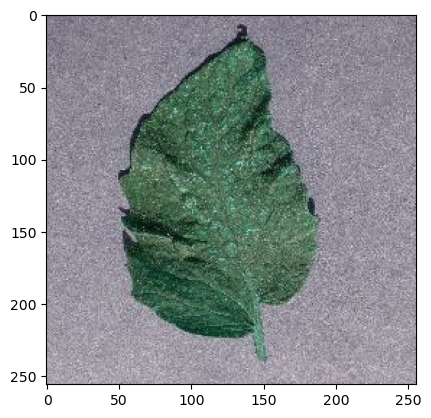

In [56]:
img_path = r"C:\Users\ARBAJ\Downloads\archive (10)\tomato\val\Tomato___Spider_mites Two-spotted_spider_mite\0a2b122a-0f23-4c92-8b7a-21b274dffbe5___Com.G_SpM_FL 9350.JPG"
img = cv.imread(img_path,)

#img_resized = cv.resize(img, (130, 130))
#img_resized=img_resized.reshape(1, 130, 130, 3)

plt.imshow(img,)
plt.show()

In [ ]:
prediction = model.predict(img_resized)
prediction